In [10]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '../..')

# for saving
import os

from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

from src import setup

In [11]:
from src import ( 
    measurements as measure,
    density_matrix as DM,
    simulation as sim,
    orders,
    random_unitary,
    simulation)

In [12]:
five_orderings = orders.n_random_c5_orders(12,101)

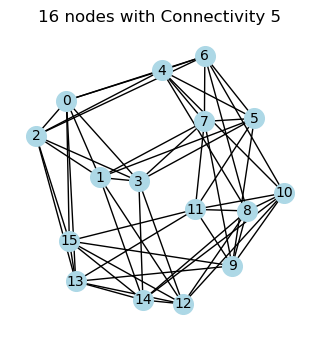

In [42]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# The data containing two arrays
data = orders.n_random_c7_orders(16,1001)
# data = orders.n_random_line_orders(16,n = 1000,chunk_sizes = [4,4,4,4])

# Iterate through the data arrays
for array in data:
    # For each group in the array
    for group in array:
        # Create edges between nodes in the same group
        for i in range(len(group)):
            for j in range(i + 1, len(group)):
                G.add_edge(group[i], group[j])

# Plot the graph
plt.figure(1,figsize=(3,3))
pos = nx.spring_layout(G, seed=42)  # Define the layout for the nodes

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=200, font_size=10)
plt.title("16 nodes with Connectivity 5")
plt.show()


In [52]:
np.pad([4],(0,3),constant_values=1)

array([4, 1, 1, 1])

[8 1 1]


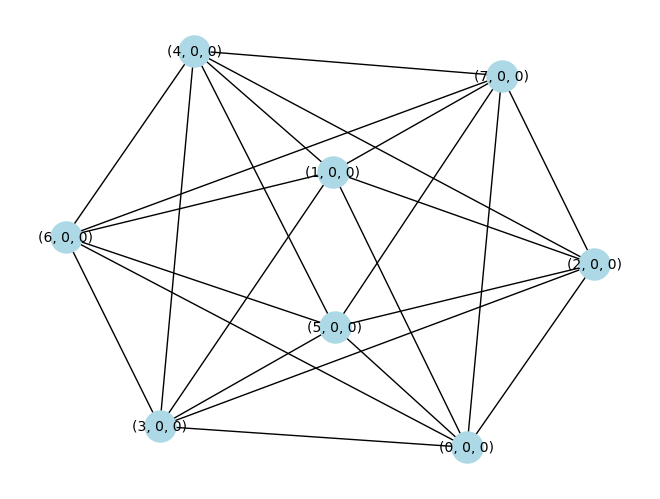

In [54]:
def cay(n,s):
    """
    s must NOT include the identity (0) and s must be the same as s inverse.
    """
    G = nx.Graph()
    
    for node in range(n):
        for m in s:
            G.add_edge(node,(node+m)%n)
    return(G)

def cay(n,s):
    """
    s must NOT include the identity (0) and s must be the same as s inverse.
    """
    n = np.array(n)
    n = np.pad(n, (0,3-len(n)), 'constant', constant_values=(1))
    print(n)
    s = [np.array(e) for e in s]
    G = nx.Graph()
    
    for id0 in range(n[0]):
        for id1 in range(n[1]):
            for id2 in range(n[2]):
                for m in s:
                    node = np.array([id0,id1,id2])
                    G.add_edge(tuple(node),tuple((node+m)%n))
    return(G)

g = cay([8],[-3,-2,-1,1,2,3])
nx.draw(g,with_labels=True, node_color='lightblue', node_size=500, font_size=10)

[ 2  2 12]


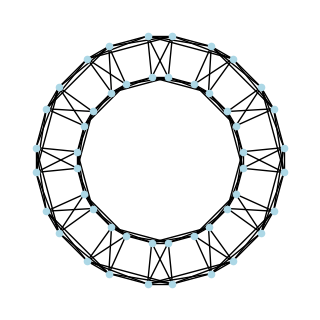

In [106]:
N = 12
g = cay([2,2,N],[[1,0,0],[0,1,0],[1,1,0],[0,1,1],[0,1,-1],[1,1,1],[1,1,-1]])
plt.figure(1,figsize=(3,3))
pos = dict()
r = 1
for i0 in range(2):
    for i1 in range(2):
        for i2 in range(N):
            theta = i2/N*2*np.pi-1/10
            theta+=i0/5
            
            if i2%2:
                r = 1+i1/2
            else:
                r = 1+(-i1/2)+.5
            pos[(i0,i1,i2)] = [r*np.cos(theta),r*np.sin(theta)]
    
nx.draw(g, pos, with_labels=False, node_color='lightblue', node_size=20, font_size=10)
plt.show()

# N = 8
# g = cay([1,2,N],[[1,0,0],[0,1,0],[1,1,0],[0,1,1],[0,1,-1],[1,1,1],[1,1,-1]])
# plt.figure(1,figsize=(10,10))
# pos = dict()
# r = 1
# for i0 in range(2):
#     for i1 in range(2):
#         for i2 in range(N):
#             theta = i2/N*2*np.pi
#             # theta+=i1/5
            
#             r = 1+.2*i1+(i2%2)
#             pos[(i0,i1,i2)] = [r*np.cos(theta),r*np.sin(theta)]
    
# nx.draw(g,pos=pos,with_labels=True, node_color='lightblue', node_size=500, font_size=10)
# plt.show()




[16  1  1]


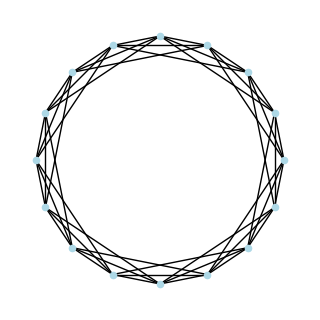

In [67]:
n = 16
# g = cay((n,1,1),[1,n//2+1,n//2,n//2-1,n-1]) #5
# g = cay([n],[-3,-2,-1,1,2,3]) #6
g = cay((n,1,1),[1,n//2+1,n//2,n//2-1,n-1]) #5
plt.figure(1,figsize=(3,3))
pos = dict()
r = 1
for index in range(N):
    theta = index/N*2*np.pi
    pos[(index,0,0)] = [r*np.cos(theta),r*np.sin(theta)]
    
# pos = nx.spring_layout(g)  # Define the layout for the nodes
nx.draw(g, pos, with_labels=False, node_color='lightblue', node_size=20, font_size=10)
plt.show()

[ 2  2 16]


NetworkXError: Node (1, 0, 0) has no position.

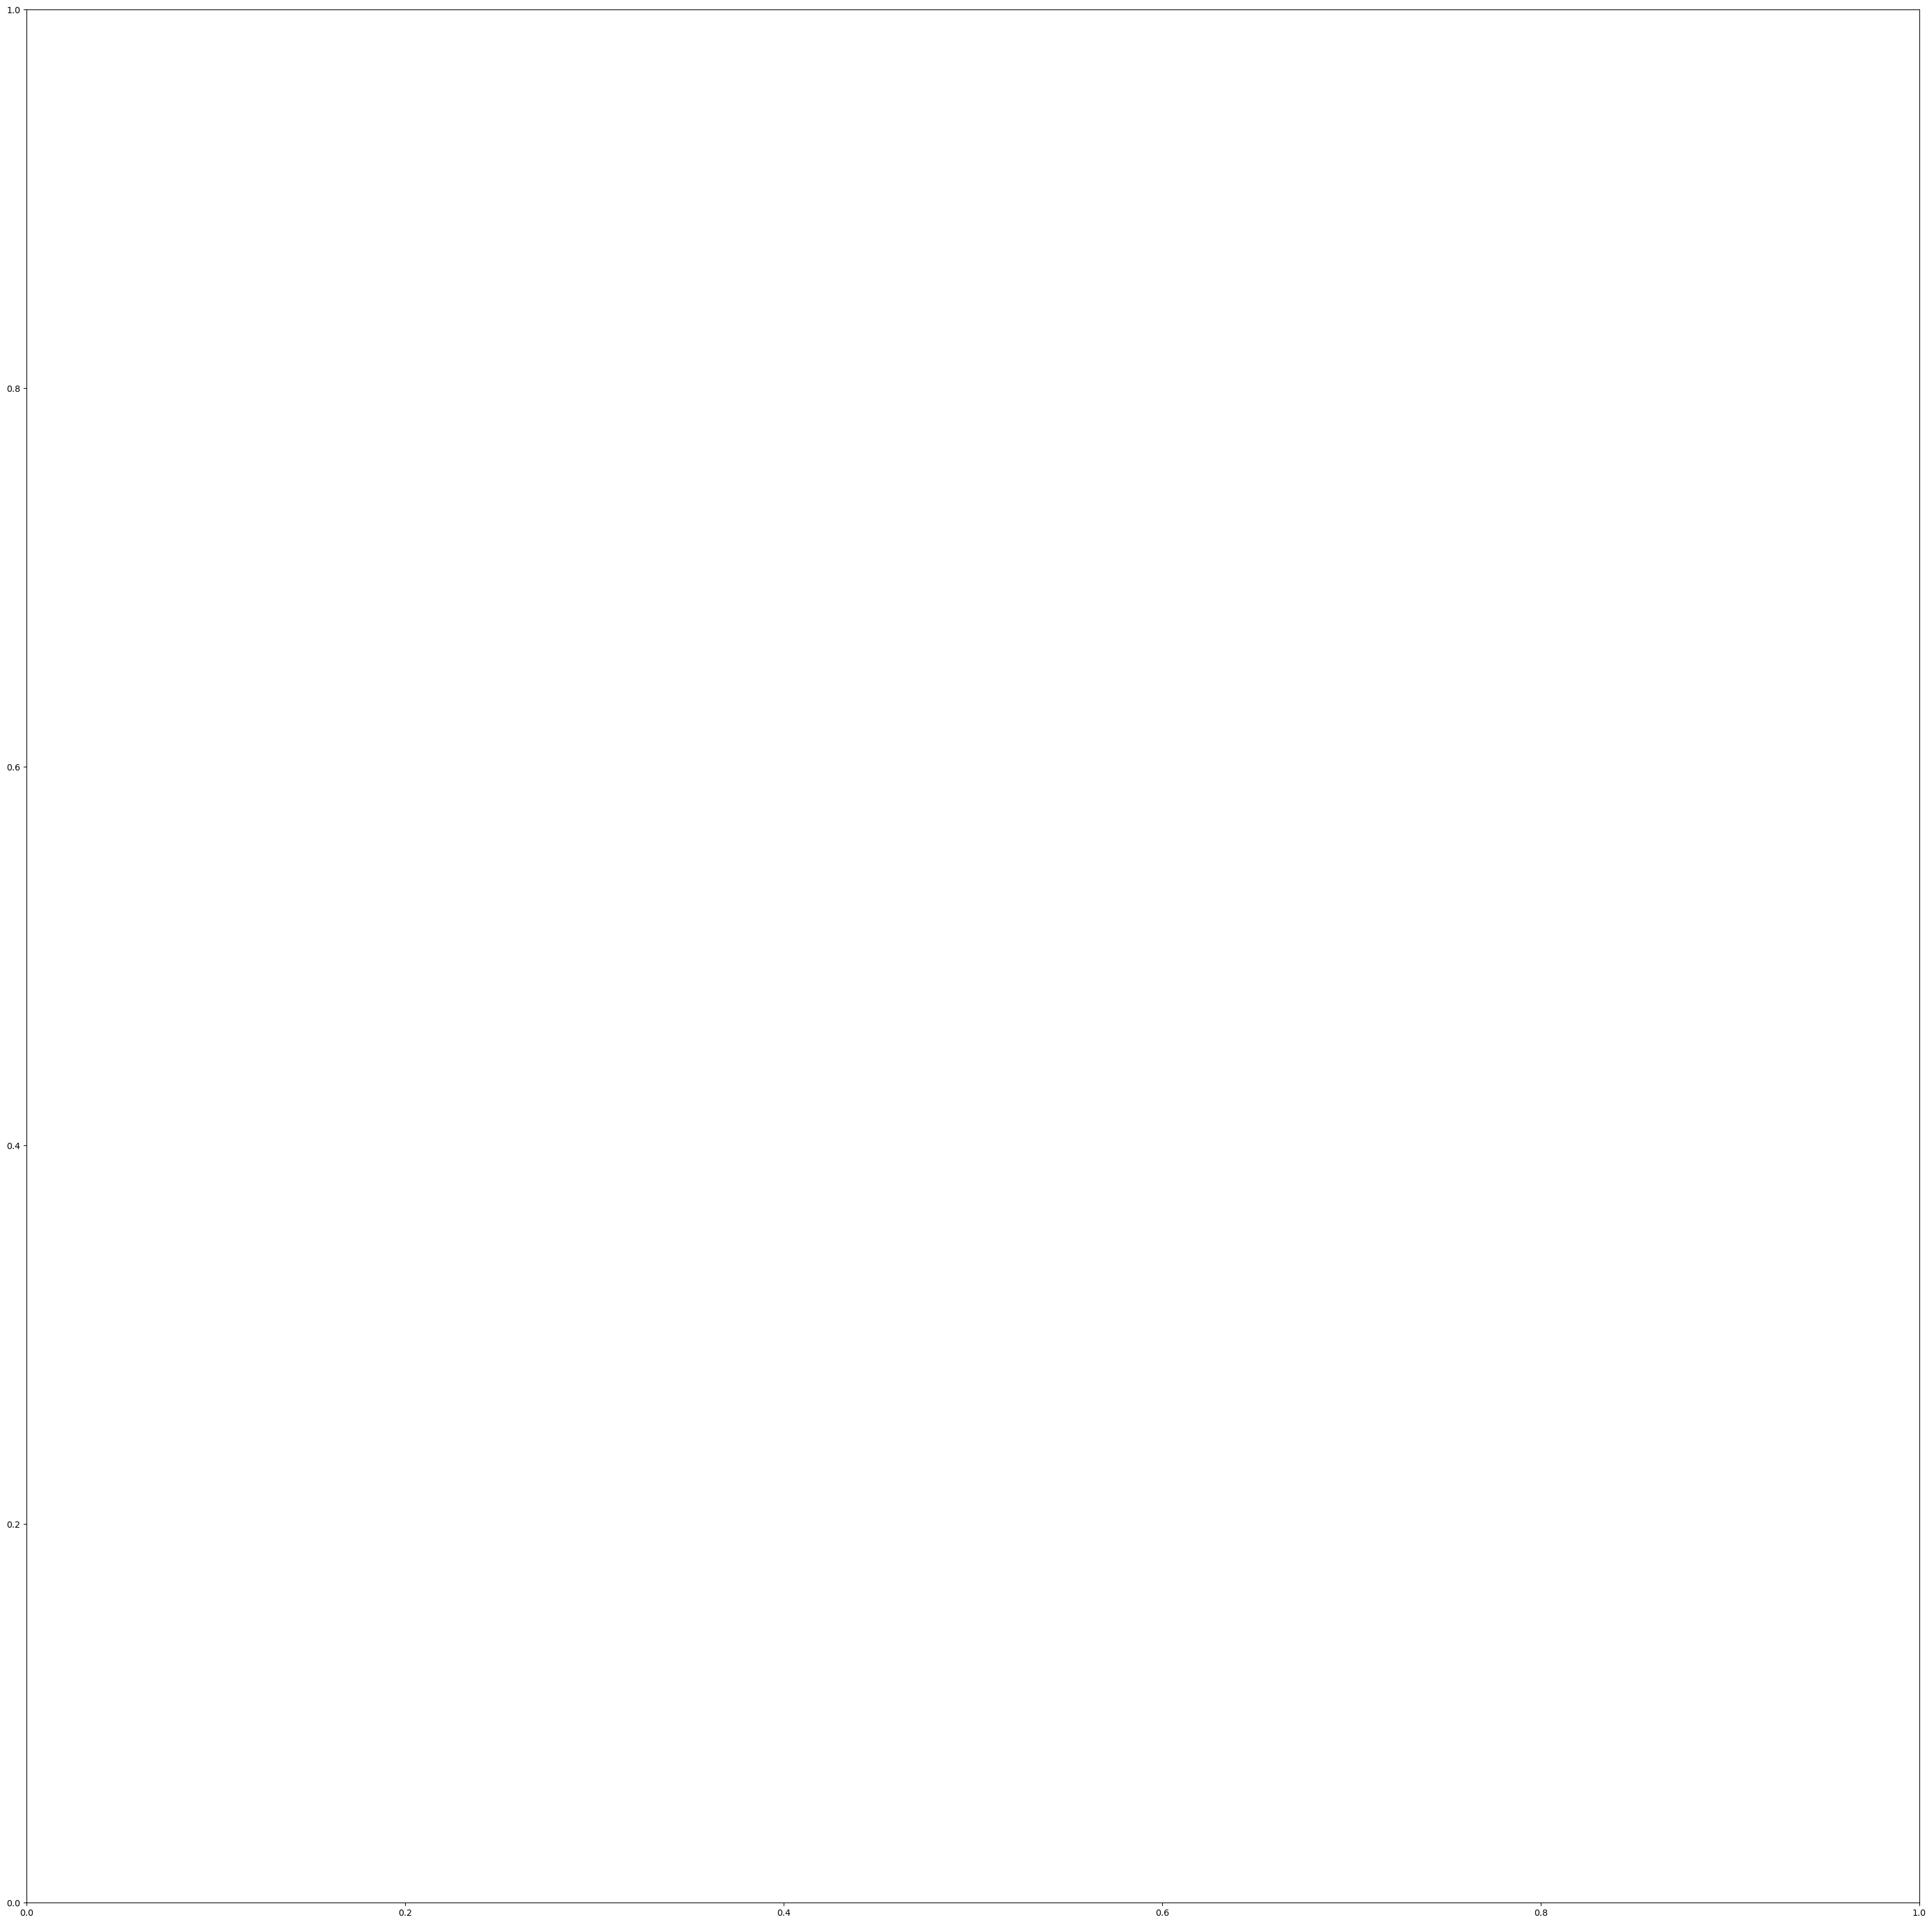

In [59]:
N = 16
g = cay([2,2,N],[[1,0,0],[1,1,0],[0,1,0],[1,1,1],[1,1,-1],[1,1,1]])
plt.figure(1,figsize=(30,30))
pos = dict()
r = 1
for index in range(N):
    theta = index/N*2*np.pi
    pos[(0,0,index)] = [r*np.cos(theta),r*np.sin(theta)]
    
nx.draw(g, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
plt.show()
